In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('sales_data_sample.csv', encoding ='latin-1')

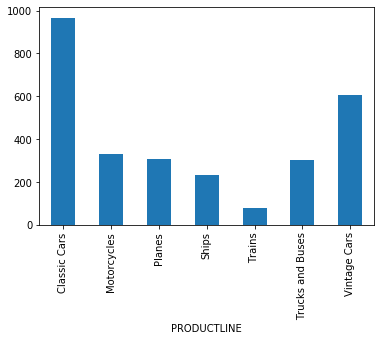

In [4]:
data.groupby('PRODUCTLINE')['SALES'].count().plot(kind='bar')

In [5]:
data.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [6]:
data.shape

(2823, 25)

In [7]:
data.apply(lambda x: (len(x.unique())))

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2          10
CITY                  73
STATE                 17
POSTALCODE            74
COUNTRY               19
TERRITORY              4
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [8]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.shape[0])*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
DEALSIZE,0,0.000000
YEAR_ID,0,0.000000
QUANTITYORDERED,0,0.000000
PRICEEACH,0,0.000000
ORDERLINENUMBER,0,0.000000
SALES,0,0.000000


In [9]:
#Filling Nan values

data['STATE'] = data['STATE'].fillna('Other')
data['TERRITORY'] =data['TERRITORY'].fillna('Other')
data['POSTALCODE'] = data['POSTALCODE'].fillna('000')
data['ADDRESSLINE2'] = data['ADDRESSLINE2'].fillna('Other')

In [10]:
data1 = data.copy()

In [11]:
data.to_csv('Cleaned_SalesData.csv',index = False)

In [12]:
data1.sort_values(by='ORDERDATE', ascending=True,inplace=True,ignore_index = True)

In [13]:
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10102,39,100.00,2,4808.31,1/10/2003 0:00,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Medium
1,10102,41,50.14,1,2055.74,1/10/2003 0:00,Shipped,1,1,2003,Vintage Cars,53,S18_1367,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Small
2,10366,49,100.00,2,6144.60,1/10/2005 0:00,Shipped,1,1,2005,Classic Cars,132,S18_2870,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium
3,10366,34,100.00,3,4207.84,1/10/2005 0:00,Shipped,1,1,2005,Classic Cars,142,S18_1984,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium
4,10366,34,100.00,1,6275.72,1/10/2005 0:00,Shipped,1,1,2005,Classic Cars,169,S18_3232,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium


In [14]:
data1.groupby(['YEAR_ID','QUANTITYORDERED'])[['ORDERLINENUMBER']].agg('count')

ORDERLINENUMBER
YEAR_ID QUANTITYORDERED                 
2003    20                            36
        21                            40
        22                            38
        23                            33
        24                            30
        25                            28
        26                            32
        27                            38
        28                            34
        29                            42
        30                            27
        31                            38
        32                            34
        33                            34
        34                            36
        35                            24
        36                            28
        37                            23
        38                            30
        39                            30
        40                            20
        41                            29
        42                            37
        43                            33
        44                            28
        45                            34
        46                            38
        47                            29
        48                            36
        49                            35
        50                            26
2004    20                            49
        21                            48
        22                            35
        23                            32
        24                            49
        25                            54
        26                            53
        27                            48
        28                            32
        29                            44
        30                            40
        31                            49
        32                            39
        33                            46
        34                            52
        35                            33
        36                            44
        37                            42
        38                            50
        39                            40
        40                            48
        41                            53
        42                            31
        43                            40
        44                            45
        45                            44
        46                            47
        47                            33
        48                            49
        49                            38
        50                            28
        55                            10
2005    6                              2
        10                             2
        11                             2
        12                             1
        13                             1
        15                             4
        16                             1
        18                             3
        19                             3
        20                             8
        21                            15
        22                            19
        23                             8
        24                            12
        25                            12
        26                            11
        27                            14
        28                            16
        29                             8
        30                             8
        31                            10
        32                            18
        33                            12
        34                            24
        35                            14
        36                            17
        37                            22
        38                            11
        39                            14
        40                            10
        41                            15
        42                             8
        43                            12
       

In [15]:
data1.groupby(['MONTH_ID','YEAR_ID'])[['QUANTITYORDERED']].agg('count')

QUANTITYORDERED
MONTH_ID YEAR_ID                 
1        2003                  39
         2004                  91
         2005                  99
2        2003                  41
         2004                  86
         2005                  97
3        2003                  50
         2004                  56
         2005                 106
4        2003                  58
         2004                  64
         2005                  56
5        2003                  58
         2004                  74
         2005                 120
6        2003                  46
         2004                  85
7        2003                  50
         2004                  91
8        2003                  58
         2004                 133
9        2003                  76
         2004                  95
10       2003                 158
         2004                 159
11       2003                 296
         2004                 301
12       2003                  70
         2004                 110

In [16]:
data1.groupby('COUNTRY')[['CITY','STATE']].agg('count')

,CITY,STATE
COUNTRY,,
Australia,185,185
Austria,55,55
Belgium,33,33
Canada,70,70
Denmark,63,63
Finland,92,92
France,314,314
Germany,62,62
Ireland,16,16


In [17]:
import datetime as dt

In [18]:
data1['ORDERDATE'] = pd.to_datetime(data1['ORDERDATE']).dt.date

In [19]:
data1['ORDERDATE_year'] = pd.DatetimeIndex(data1['ORDERDATE']).year
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ORDERDATE_year
0,10102,39,100.00,2,4808.31,2003-01-10,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Medium,2003
1,10102,41,50.14,1,2055.74,2003-01-10,Shipped,1,1,2003,Vintage Cars,53,S18_1367,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Small,2003
2,10366,49,100.00,2,6144.60,2005-01-10,Shipped,1,1,2005,Classic Cars,132,S18_2870,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium,2005
3,10366,34,100.00,3,4207.84,2005-01-10,Shipped,1,1,2005,Classic Cars,142,S18_1984,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium,2005
4,10366,34,100.00,1,6275.72,2005-01-10,Shipped,1,1,2005,Classic Cars,169,S18_3232,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Other,Charleroi,Other,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium,2005


In [20]:
print(data1[data1['YEAR_ID']==2003].shape)
print(data1[data1['YEAR_ID']==2004].shape)
print(data1[data1['YEAR_ID']==2005].shape)

(1000, 26)
(1345, 26)
(478, 26)


In [21]:
data1.groupby(['ORDERDATE_year'])['SALES'].agg('count').to_frame()

,SALES
ORDERDATE_year,
2003,1000
2004,1345
2005,478


In [22]:
data1.groupby(['ORDERDATE_year','QUANTITYORDERED'])['SALES'].agg('count').to_frame()

SALES
ORDERDATE_year QUANTITYORDERED       
2003           20                  36
               21                  40
               22                  38
               23                  33
               24                  30
               25                  28
               26                  32
               27                  38
               28                  34
               29                  42
               30                  27
               31                  38
               32                  34
               33                  34
               34                  36
               35                  24
               36                  28
               37                  23
               38                  30
               39                  30
               40                  20
               41                  29
               42                  37
               43                  33
               44                  28
               45                  34
               46                  38
               47                  29
               48                  36
               49                  35
               50                  26
2004           20                  49
               21                  48
               22                  35
               23                  32
               24                  49
               25                  54
               26                  53
               27                  48
               28                  32
               29                  44
               30                  40
               31                  49
               32                  39
               33                  46
               34                  52
               35                  33
               36                  44
               37                  42
               38                  50
               39                  40
               40                  48
               41                  53
               42                  31
               43                  40
               44                  45
               45                  44
               46                  47
               47                  33
               48                  49
               49                  38
               50                  28
               55                  10
2005           6                    2
               10                   2
               11                   2
               12                   1
               13                   1
               15                   4
               16                   1
               18                   3
               19                   3
               20                   8
               21                  15
               22                  19
               23                   8
               24                  12
               25                  12
               26                  11
               27                  14
               28                  16
               29                   8
               30                   8
               31                  10
               32                  18
               33                  12
               34                  24
               35                  14
               36                  17
               37                  22
               38                  11
               39                  14
               40                  10
               41                  15
               42                   8
               43                  12
               44                  16
               45                  19
               46                  16
               47                   8
               48                   9
               49                  18
               50                  11
               51                   4
    

In [23]:
data1.shape

(2823, 26)

In [24]:
data1.groupby(['COUNTRY'])['SALES'].agg('count')

COUNTRY
Australia       185
Austria          55
Belgium          33
Canada           70
Denmark          63
Finland          92
France          314
Germany          62
Ireland          16
Italy           113
Japan            52
Norway           85
Philippines      26
Singapore        79
Spain           342
Sweden           57
Switzerland      31
UK              144
USA            1004
Name: SALES, dtype: int64

In [25]:
data1.groupby(['CITY','STATE'])['SALES'].agg('count').to_frame()

,,SALES
CITY,STATE,
Aaarhus,Other,27
Allentown,PA,31
Barcelona,Other,23
Bergamo,Other,48
Bergen,Other,29
Boras,Other,38
Boston,MA,44
Brickhaven,MA,47
Bridgewater,CT,25


In [26]:
data1.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ORDERDATE_year
0,10102,39,100.00,2,4808.31,2003-01-10,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Medium,2003
1,10102,41,50.14,1,2055.74,2003-01-10,Shipped,1,1,2003,Vintage Cars,53,S18_1367,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,Other,Frick,Michael,Small,2003


In [27]:
monthly_sales=data1.groupby(["ORDERNUMBER"])[["ORDERDATE","PRICEEACH","SALES"]].agg({"ORDERDATE":["min",'max'],"PRICEEACH":"mean","SALES":"count"})

In [28]:
monthly_sales

ORDERDATE               PRICEEACH SALES
                    min         max        mean count
ORDERNUMBER                                          
10100        2003-01-06  2003-01-06   72.195000     4
10101        2003-01-09  2003-01-09   71.240000     4
10102        2003-01-10  2003-01-10   75.070000     2
10103        2003-01-29  2003-01-29   88.596250    16
10104        2003-01-31  2003-01-31   81.683846    13
10105        2003-02-11  2003-02-11   85.284000    15
10106        2003-02-17  2003-02-17   78.882222    18
10107        2003-02-24  2003-02-24   92.801250     8
10108        2003-03-03  2003-03-03   82.811250    16
10109        2003-03-10  2003-03-10   88.683333     6
10110        2003-03-18  2003-03-18   75.720625    16
10111        2003-03-25  2003-03-25   83.288333     6
10112        2003-03-24  2003-03-24  100.000000     2
10113        2003-03-26  2003-03-26   79.582500     4
10114        2003-04-01  2003-04-01   85.446000    10
10115        2003-04-04  2003-04-04   93.872000     5
10116        2003-04-11  2003-04-11   63.380000     1
10117        2003-04-16  2003-04-16   87.434167    12
10118        2003-04-21  2003-04-21  100.000000     1
10119        2003-04-28  2003-04-28   79.572143    14
10120        2003-04-29  2003-04-29   84.979333    15
10121        2003-05-07  2003-05-07   83.964000     5
10122        2003-05-08  2003-05-08   79.760000    17
10123        2003-05-20  2003-05-20   89.967500     4
10124        2003-05-21  2003-05-21   72.393077    13
10125        2003-05-21  2003-05-21  100.000000     2
10126        2003-05-28  2003-05-28   86.850000    17
10127        2003-06-03  2003-06-03   85.852000    15
10128        2003-06-06  2003-06-06   97.290000     4
10129        2003-06-12  2003-06-12   84.391111     9
10130        2003-06-16  2003-06-16   98.170000     2
10131        2003-06-16  2003-06-16   77.630000     8
10133        2003-06-27  2003-06-27   78.186250     8
10134        2003-07-01  2003-07-01   90.441429     7
10135        2003-07-02  2003-07-02   79.855882    17
10136        2003-07-04  2003-07-04  100.000000     3
10137        2003-07-10  2003-07-10   87.340000     4
10139        2003-07-16  2003-07-16   88.048750     8
10140        2003-07-24  2003-07-24   87.820000    11
10141        2003-08-01  2003-08-01   81.930000     9
10142        2003-08-08  2003-08-08   85.518125    16
10143        2003-08-10  2003-08-10   81.083750    16
10144        2003-08-13  2003-08-13   81.860000     1
10145        2003-08-25  2003-08-25   83.837500    16
10146        2003-09-03  2003-09-03   83.570000     2
10147        2003-09-05  2003-09-05   82.370909    11
10148        2003-09-11  2003-09-11   88.970000    14
10149        2003-09-12  2003-09-12   75.168182    11
10150        2003-09-19  2003-09-19   85.644545    11
10151        2003-09-21  2003-09-21   87.344000    10
10152        2003-09-25  2003-09-25   79.065000     4
10153        2003-09-28  2003-09-28   86.914615    13
10154        2003-10-02  2003-10-02   77.750000     2
10155        2003-10-06  2003-10-06   81.965385    13
10156        2003-10-08  2003-10-08   70.510000     2
10158        2003-10-10  2003-10-10   67.030000     1
10159        2003-10-10  2003-10-10   83.056111    18
10160        2003-10-11  2003-10-11   87.591667     6
10161        2003-10-17  2003-10-17   90.306667    12
10162        2003-10-18  2003-10-18   71.476000    10
10163        2003-10-20  2003-10-20   93.585000     6
10164        2003-10-21  2003-10-21   86.233750     8
10165        2003-10-22  2003-10-22   85.153889    18
10166        2003-10-21  2003-10-21   91.243333     3
10167        2003-10-23  2003-10-23   81.586875    16
10168        2003-10-28  2003-10-28   86.587778    18
10169        2003-11-04  2003-11-04   80.174615    13
10170        2003-11-04  2003-11-04   90.785000     4
10171        2003-11-05  2003-11-05   83.872500     4
10172        2003-11-05  2003-11-05   84.100000     8
10173        2003-11-05  2003-11-05   74.569375    16
10174        2003-

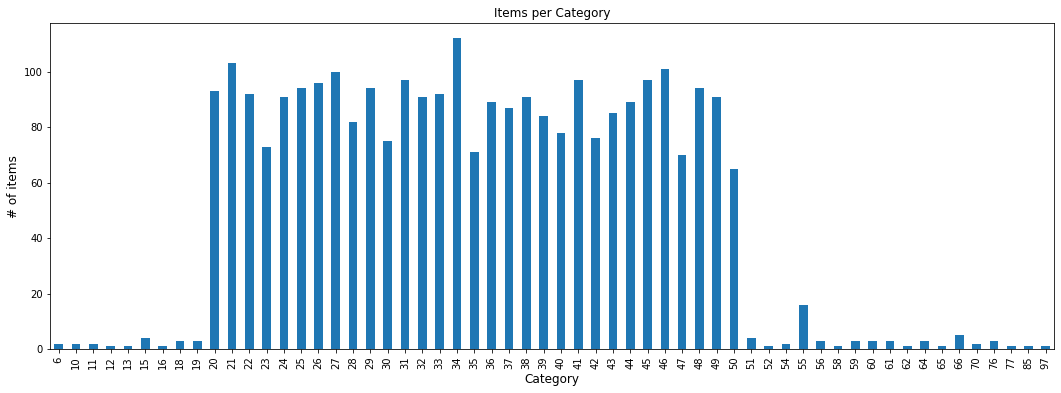

In [30]:
plt.figure(figsize=(18,6))
data1.groupby('QUANTITYORDERED')['SALES'].count().plot.bar()
plt.title("Items per Category")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [31]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'], dtype='object')

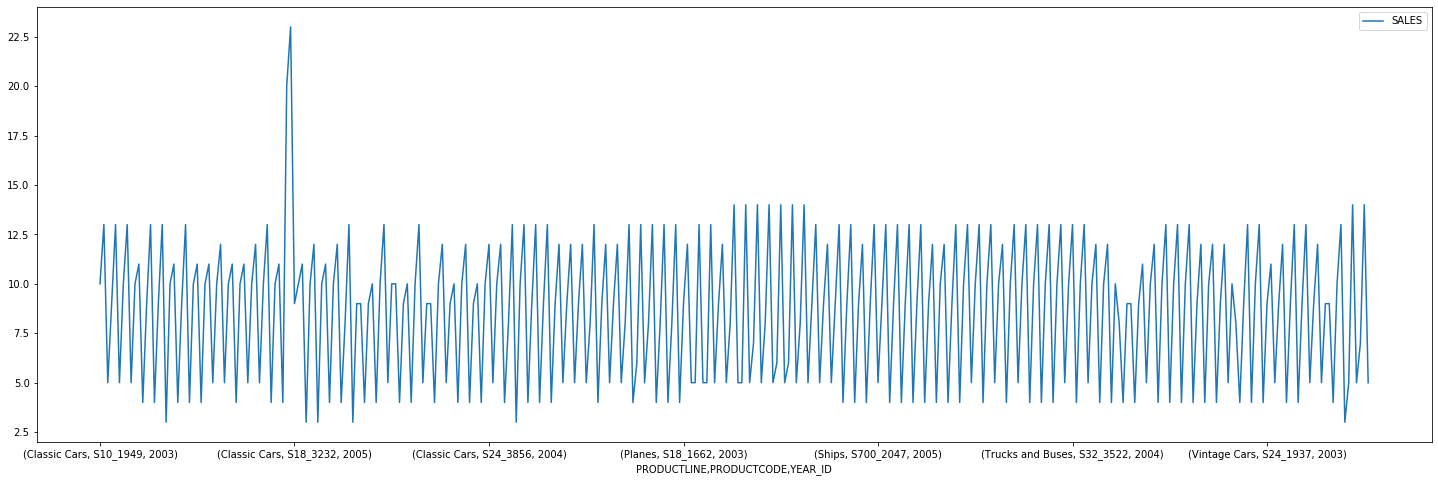

In [32]:
data.groupby(['PRODUCTLINE','PRODUCTCODE','YEAR_ID'])[['SALES']].agg('count').plot(figsize=(25,8))

In [33]:
data2 = data1[data1['ORDERDATE_year']==2003]
data3 = data1[data1['ORDERDATE_year']==2004]
data4 = data1[data1['ORDERDATE_year']==2005]

Text(0.5, 0, 'month_id')

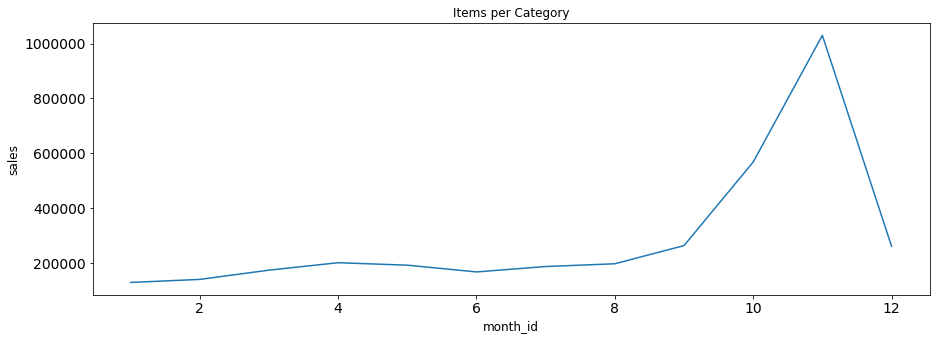

In [34]:
Temp = data2.groupby(['MONTH_ID'])['SALES'].sum()
Temp.plot(figsize=(15, 5), title='Items per Category', fontsize=14)
plt.ylabel('sales', fontsize=12)
plt.xlabel('month_id', fontsize=12)

Text(0.5, 0, 'month_id')

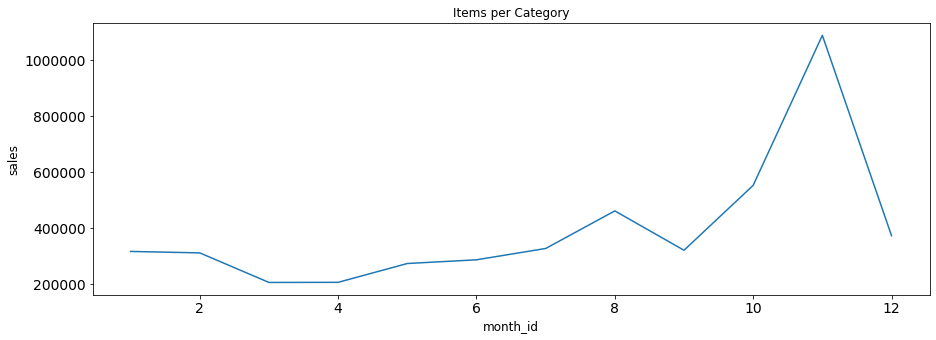

In [35]:
Temp = data3.groupby(['MONTH_ID'])['SALES'].sum()
Temp.plot(figsize=(15, 5), title='Items per Category', fontsize=14)
plt.ylabel('sales', fontsize=12)
plt.xlabel('month_id', fontsize=12)

Text(0.5, 0, 'month_id')

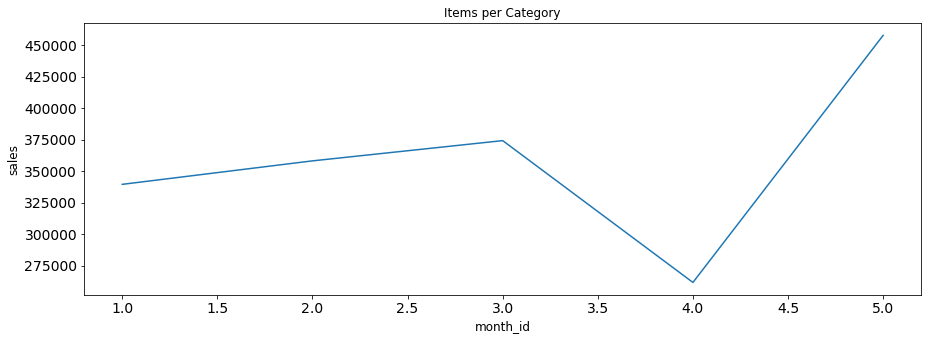

In [36]:
Temp = data4.groupby(['MONTH_ID'])['SALES'].sum()
Temp.plot(figsize=(15, 5), title='Items per Category', fontsize=14)
plt.ylabel('sales', fontsize=12)
plt.xlabel('month_id', fontsize=12)